# AIPI 590 - XAI | Assignment #4
### Using iModels Library (RuleFitRegressor) to build Interpretable Model for Salary prediction
### Ritu Toshniwal


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ritu1412/Interpretable-Models-using-iModels-Library/blob/main/notebooks/rule_fit_algorithm.ipynb)

In [ ]:
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Interpretable-Models-using-iModels-Library" 
git_path = 'https://github.com/ritu1412/Interpretable-Models-using-iModels-Library.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'notebooks'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

In [1]:
# Package commun
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from imodels import RuleFitRegressor
warnings.filterwarnings("ignore", category=FutureWarning)


/Users/ritutoshniwal/Code/iModels_main/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Exploratory Data Analysis (EDA)

In [2]:
initial_data=pd.read_csv('../data/Salary Data.csv')

In [3]:
print("Dimension of dataframe :",initial_data.shape,"\n")

Dimension of dataframe : (375, 6) 



In [4]:
initial_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
initial_data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
len_before_drop = len(initial_data)
initial_data.dropna(inplace=True)

In [8]:
initial_data.drop_duplicates(inplace=True)

In [9]:
initial_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Encoding the data for model training

In [16]:
encoded_df = pd.get_dummies(initial_data, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

# Separate the target (Salary) and features (independent variables)
X = encoded_df.drop('Salary', axis=1)  # Features
y = encoded_df['Salary']  # Target

# Display the encoded data
print(X.head())
print(y.head())

    Age  Years of Experience  Gender_Male  Education Level_Master's  \
0  32.0                  5.0         True                     False   
1  28.0                  3.0        False                      True   
2  45.0                 15.0         True                     False   
3  36.0                  7.0        False                     False   
4  52.0                 20.0         True                      True   

   Education Level_PhD  Job Title_Accountant  \
0                False                 False   
1                False                 False   
2                 True                 False   
3                False                 False   
4                False                 False   

   Job Title_Administrative Assistant  Job Title_Business Analyst  \
0                               False                       False   
1                               False                       False   
2                               False                       False   
3       

# Building the model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [18]:
model = RuleFitRegressor()

In [19]:
model.fit(X_train, y_train)

RuleFitRegressor()

In [20]:
Train_pred = model.predict(X_train)
Test_pred = model.predict(X_test)

In [21]:
train_mae = mean_absolute_error(y_train, Train_pred)
test_mae = mean_absolute_error(y_test, Test_pred)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 11353.340738951048
Test MAE: 10405.758473724127


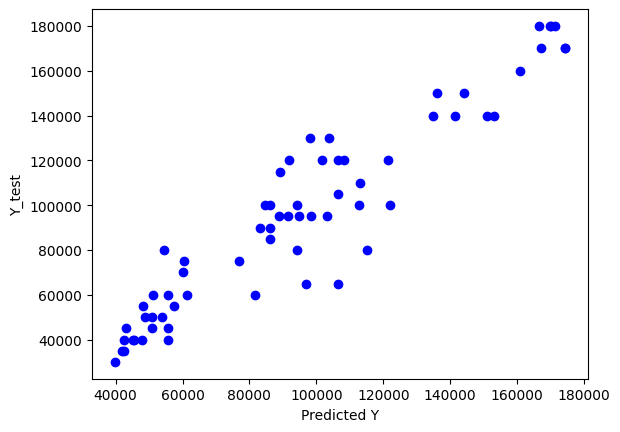

In [22]:
plt.scatter(Test_pred,y_test, c='b')
plt.xlabel('Predicted Y')
plt.ylabel('Y_test')
plt.show()

In [23]:
r_sq = model.score(X_train, y_train)
print(r_sq)

0.8935811453814606


In [24]:
visulaize= model.visualize()
visulaize

,rule,coef
0,Age,2635.60
2,Gender_Male,3035.58
3,Education Level_Master's,12174.95
4,Education Level_PhD,15785.75
1,Years of Experience,543.44
193,Years of Experience <= 15.5,-10912.10
194,Age <= 43.5,-2973.37
192,Age <= 42.5,-4679.49
196,Years of Experience > 5.5,148.49
189,Years of Experience <= 12.5,-4109.78


- **rule**: These are the rules and features generated from the decision tree model. The rules are based on conditions applied to features (e.g., `Age <= 43.5`, `Years of Experience > 5.5`). Some rows represent combinations of feature interactions.
- **coef**: These are the coefficients assigned to each rule or feature by the regression model. A positive coefficient suggests that the rule contributes positively to the target value 'salary', while a negative coefficient suggests that the rule contributes negatively.

### Interpretation of Key Rows:
   - `Age (2322.68)`, `Years of Experience (577.78)`, `Gender_Male (2075.03)` have linear coefficients that indicate how much each feature contributes to the predicted target.Each additional year of age increases the predicted target by 2322.68 units (likely salary). Similarly, being male (`Gender_Male`) adds 2075.03 units to the prediction.

   - The coefficients for `Education Level_Master's (10795.07)` and `Education Level_PhD (13250.02)` indicate the increase in the target (salary) for individuals with these education levels compared to the baseline (likely Bachelor's degree). Holding all else constant, individuals with a Master's degree earn about 10,795 units more than those with only a Bachelor's, while PhD holders earn about 13,250 units more.

   - The rules like `Age <= 43.5 (-3279.11)` and `Years of Experience <= 12.5 (-4094.84)` represent decision-tree derived rules that interact with features. These rules capture non-linear relationships between features and the target. For instance, if an individual's age is less than or equal to 43.5 years, it decreases the target (e.g., salary) by 3279.11 units. Similarly, having fewer than or equal to 12.5 years of experience results in a reduction of 4094.84 units in the prediction.

   - The rules that involve multiple features, such as `Age <= 40.5 and Years of Experience <= 5.5 (-1275.15)`, show how combinations of features impact the outcome.If both conditions are true (age ≤ 40.5 and years of experience ≤ 5.5), it decreases the predicted target (salary) by 1275.15 units. These rules help capture more complex relationships between variables that a linear regression alone might miss.

   - Some more complex rules, like `Age > 40.5 and Years of Experience > 15.5 and Job Title_CEO <= 0.5 and Job Title_Chief Data Officer <= 0.5 and Education Level_Master's <= 0.5 and Education Level_PhD <= 0.5 (-3097.10)`, represent a combination of many conditions. This particular rule means that if a person does not have any of the listed titles or degrees, their predicted target decreases by 3097.10 units.The negative coefficient indicates that this rule captures a lower salary for individuals without a high-level job title or advanced degree.

### Conclusion:

- **Rules with Positive Coefficients:** Rules like `Years of Experience > 5.5 (826.58)` increase the prediction when the rule holds true. This makes sense: more experience or older age generally leads to higher salaries or better outcomes in many contexts.
  
- **Rules with Negative Coefficients:** Rules like `Years of Experience <= 12.5 (-4094.84)` lower the prediction when true. This reflects the fact that less experience or being younger might correlate with lower salaries or other outcomes.